
# Project: Investigate a Dataset TMDb movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> I always liked movies. Action movies of course with Tom Cruise. What ever he did, he did it great. But was it really just because of him? Maybe also the book was great? Or even more important maybe he just had a great director? A director is like maestro. At the end he brings all together. 

> So lets check the IMDb for great directors. Who made the most successful movies? By ratings and by profit?

In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [2]:
# Load data
df = pd.read_csv('tmdb-movies.csv')

In [3]:
# print out a few lines
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
# inspect data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09




### Data Cleaning (drop dupliactes, nulls and zeros)

In [6]:

# remvoving duplicates
df.drop_duplicates(inplace=True)

# removing columns with null
df.dropna(inplace=True)

# removing rows with 0
df = df[(df != 0).all(1)]



In [7]:
#removing none required columns from the database
df = df.drop( ['id', 'imdb_id', 'homepage', 'keywords', 'overview', 'production_companies', 
               'vote_count', 'vote_average'], 1)

In [8]:
# fix datatype issue of release date
df['release_date'] = pd.to_datetime(df['release_date'])

In [9]:
# profit is missing in the dataset
df['profit_adj'] = df['revenue_adj'] - df['budget_adj']

In [10]:
df.head()

,popularity,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year,budget_adj,revenue_adj,profit_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015,1.379999e+08,3.481613e+08,2.101614e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2015,1.012000e+08,2.716190e+08,1.704191e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015,1.839999e+08,1.902723e+09,1.718723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,2015-04-01,2015,1.747999e+08,1.385749e+09,1.210949e+09


Summary:
* duplicates are removed
* columns with null are removed
* rows with 0 are removed
* removed none required columns from the database
* fixed datatype issue of release date
* added new colume profit

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 Which first director was responsible for the most popular movies?

Bevore we have a look at which director made the most popular movies we have a general look at the distribution of popularity.

Text(0,0.5,'Distribution')

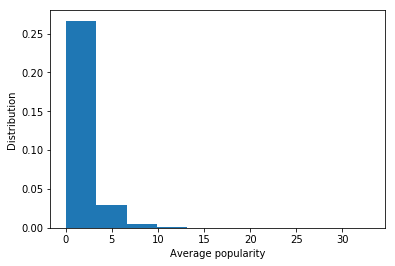

In [11]:
plt.hist( df['popularity'] ,density = 1) 
plt.title('Distribution of popularity')
plt.xlabel('Average popularity')
plt.ylabel('Distribution')

Most movies have a popularity below 5. Who made the really popular movies? Therefore we create a new element where we sort directors by popularity. Please note: If there are multiple directors we only look at the first director.

In [12]:
df['director'] = df['director'].apply(lambda x: x.split('|')[0]) # whats a second director doing anyway?
director_popularity = df.groupby(['director'])['popularity'].mean().nlargest(25)
print (director_popularity)

director
Colin Trevorrow      32.985763
George Miller        14.675428
Joe Russo            12.971027
Chad Stahelski       11.422751
Don Hall              8.691294
Christopher Nolan     8.635610
Morten Tyldum         8.110711
Joe Johnston          7.959228
Kyle Balda            7.404165
Robert Schwentke      7.401188
James Gunn            7.377549
MÃ¥ns MÃ¥rlind        7.031452
Alan Taylor           6.883129
Joss Whedon           6.791347
Pete Docter           6.326804
Alex Garland          6.118847
Chris Buck            6.112766
Luc Besson            5.947136
Peter Jackson         5.625672
Wes Ball              5.553082
Dan Gilroy            5.522641
J.J. Abrams           5.432624
Quentin Tarantino     5.303161
David Yates           5.126634
Sam Mendes            5.119863
Name: popularity, dtype: float64


In [13]:
# Lets check for Colin Trevorrow
df.query('director=="Colin Trevorrow"')

,popularity,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year,budget_adj,revenue_adj,profit_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015,1.379999e+08,1.392446e+09,1.254446e+09


In [14]:
# You only need to make 1 good movie!

In [15]:
# Lets check for J.J. Abrams in detail:
df.query('director=="J.J. Abrams"')

,popularity,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year,budget_adj,revenue_adj,profit_adj
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015,1.839999e+08,1.902723e+09,1.718723e+09
3400,2.026717,50000000,260095987,Super 8,Joel Courtney|Elle Fanning|Riley Griffiths|Kyl...,J.J. Abrams,It Arrives.,112,Thriller|Science Fiction|Mystery,2011-06-08,2011,4.846990e+07,2.521365e+08,2.036666e+08
6561,3.098051,150000000,397850012,Mission: Impossible III,Tom Cruise|Philip Seymour Hoffman|Ving Rhames|...,J.J. Abrams,The Mission Begins 05:05:06.,126,Adventure|Action|Thriller,2006-05-03,2006,1.622504e+08,4.303421e+08,2.680917e+08


Is our calculation working correctly? Lets do a small check for the data above:

(11.173104+2.026717+3.098051)/3 = 5.432624 


Yes, our evaluation is correct.

One note: Just dont make bad movies!

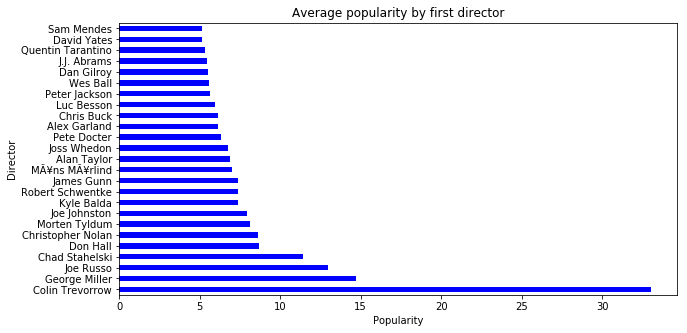

In [16]:
plt.subplots(figsize=(10, 5))
s = pd.Series(director_popularity.values, index=director_popularity.index)
s.plot(kind='barh', color=['b'])
plt.title('Average popularity by first director')
plt.ylabel('Director')
plt.xlabel('Popularity');

Ok, Colin Trevorrow made the most popular movie: Jurassic World.

### Research Question 2  Who is the director with most profit?

Lets start with having a look at the distribution of profit.

Text(0,0.5,'Distribution')

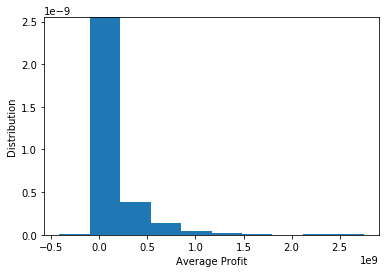

In [17]:
plt.hist( df['profit_adj'] ,density = 1) 
plt.title('Distribution of profit')
plt.xlabel('Average Profit')
plt.ylabel('Distribution')

Most movies made a profit below 500.000.000 Dollar. Who made the really profitable movies?

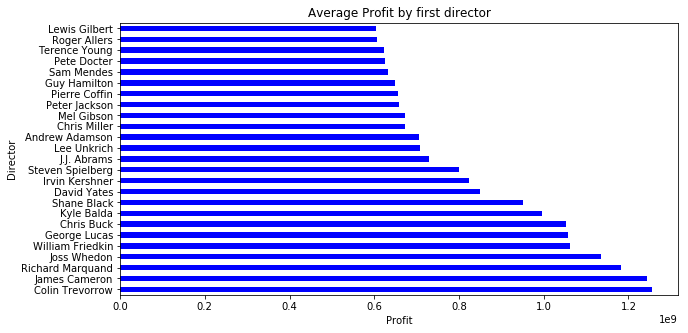

In [18]:
plt.subplots(figsize=(10, 5))
director_profit = df.groupby(['director'])['profit_adj'].mean().nlargest(25)
s = pd.Series(director_profit.values, index=director_profit.index)
s.plot(kind='barh', color=['b'])
plt.title('Average Profit by first director')
plt.ylabel('Director')
plt.xlabel('Profit');

Colin Trevorrow did it again. He made the movie with the highest profit. Good job!

<a id='conclusions'></a>
## Conclusions

> There are some limitations in our evaluation. Some data was missing and the corresponding movies were removed. So we can not be 100% certain if the evaluation is correct. Also the data set is not really up the date and misses the latest hits. And dont forget, we only looked at the first director!

> Colin Trevorrow really hit it with Jurassic World. Its most popular and most profitable! James Cameron on the other hand made profitable movies that are not so popular. Quentin Tarantino makes popular movies that are not that profitable. J.J. Abrams even though he made a few "bad" movies, he is still very profitable.


## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [19]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0